#### 그림, 실습코드 등 학습자료 출처 : https://datascienceschool.net

## 1. 단순 신경망 사용 시

### # 데이터 확인

- data : 64 * 64 픽셀의 행렬데이터
- target : 약 40 종류의 사진, 라벨링번호(1 ~ 40)

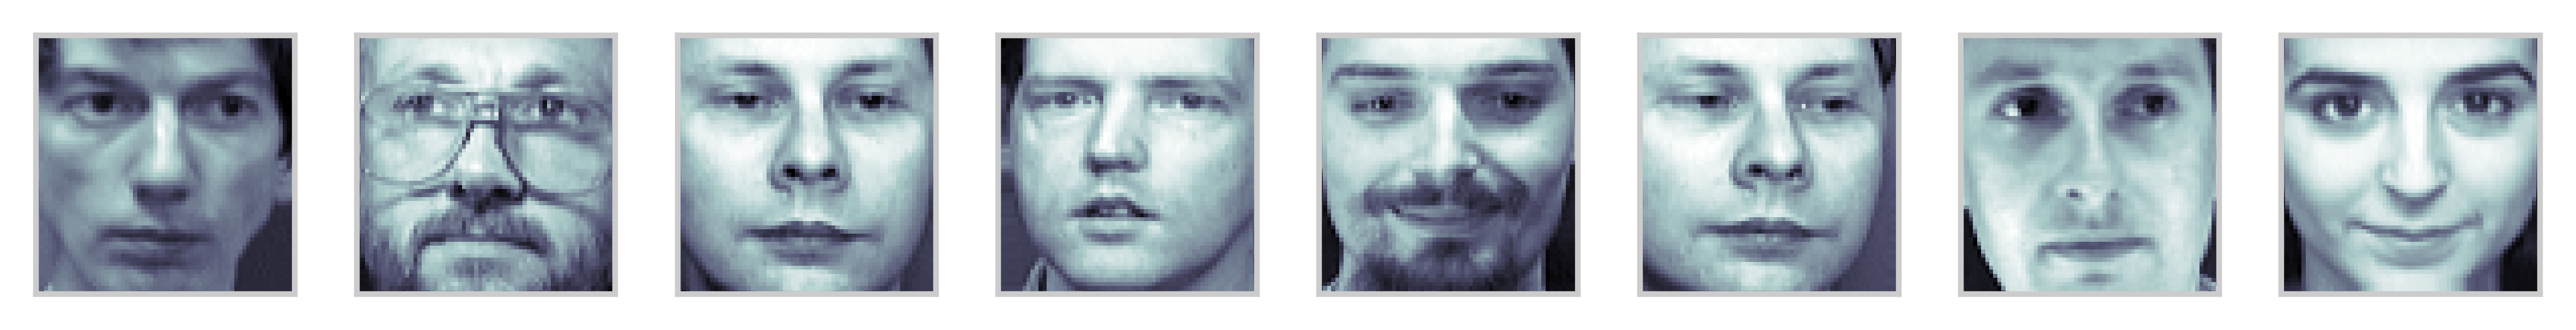

In [32]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
mpl.rc('figure', dpi=300)
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

## 올리베티 이미지 다운로드
faces = fetch_olivetti_faces()

## train, test 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(faces.images, faces.target, test_size=0.4, random_state=0)

## 같은 배열에 대해 차원만 1차원 증가시키기 위해 newaxis 명령을 사용
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

y_train = np_utils.to_categorical(y_train, 40)
y_test = np_utils.to_categorical(y_test, 40)

plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(x_train[i, :, :, 0], cmap=mpl.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

### # 데이터 전처리

- train, test 데이터 분리
- data의 형태 변환 : 4 x 64 행렬 => 1 X 4096의 백터로 변환
- target의 형태변환 : 원핫인코딩 처리

In [38]:
## 올리베티 이미지 다운로드
faces = fetch_olivetti_faces()

## train, test 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(faces.images, faces.target, test_size=0.4, random_state=0)

## 64 x 64 행렬 => 1 X 4096의 백터로 변환
x_train = x_train.reshape(240, 4096)
x_test = x_test.reshape(160, 4096)

y_train = np_utils.to_categorical(y_train, 40)
y_test = np_utils.to_categorical(y_test, 40)

### # 모델생성

- 입력계층 n = 4096
- 은닉계층 n = 80
- 출력계층 n = 40
- learning rate = 0.2
- 평가지료 : 정확도, mean squared error
- 활성화함수 : 시그모이드

In [34]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(80, input_dim=4096, activation="sigmoid"))
model.add(Dense(40, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

- 애포크 : 10만
- 배치사이즈 : 100

쇼요시간이 상당하여 실행화면 전시생략

In [ ]:
%%time
hist = model.fit(x_train, y_train,
                 epochs=100000, batch_size=100,
                 validation_data=(x_test, y_test),
                 verbose=2)

### # 모델성능 확인

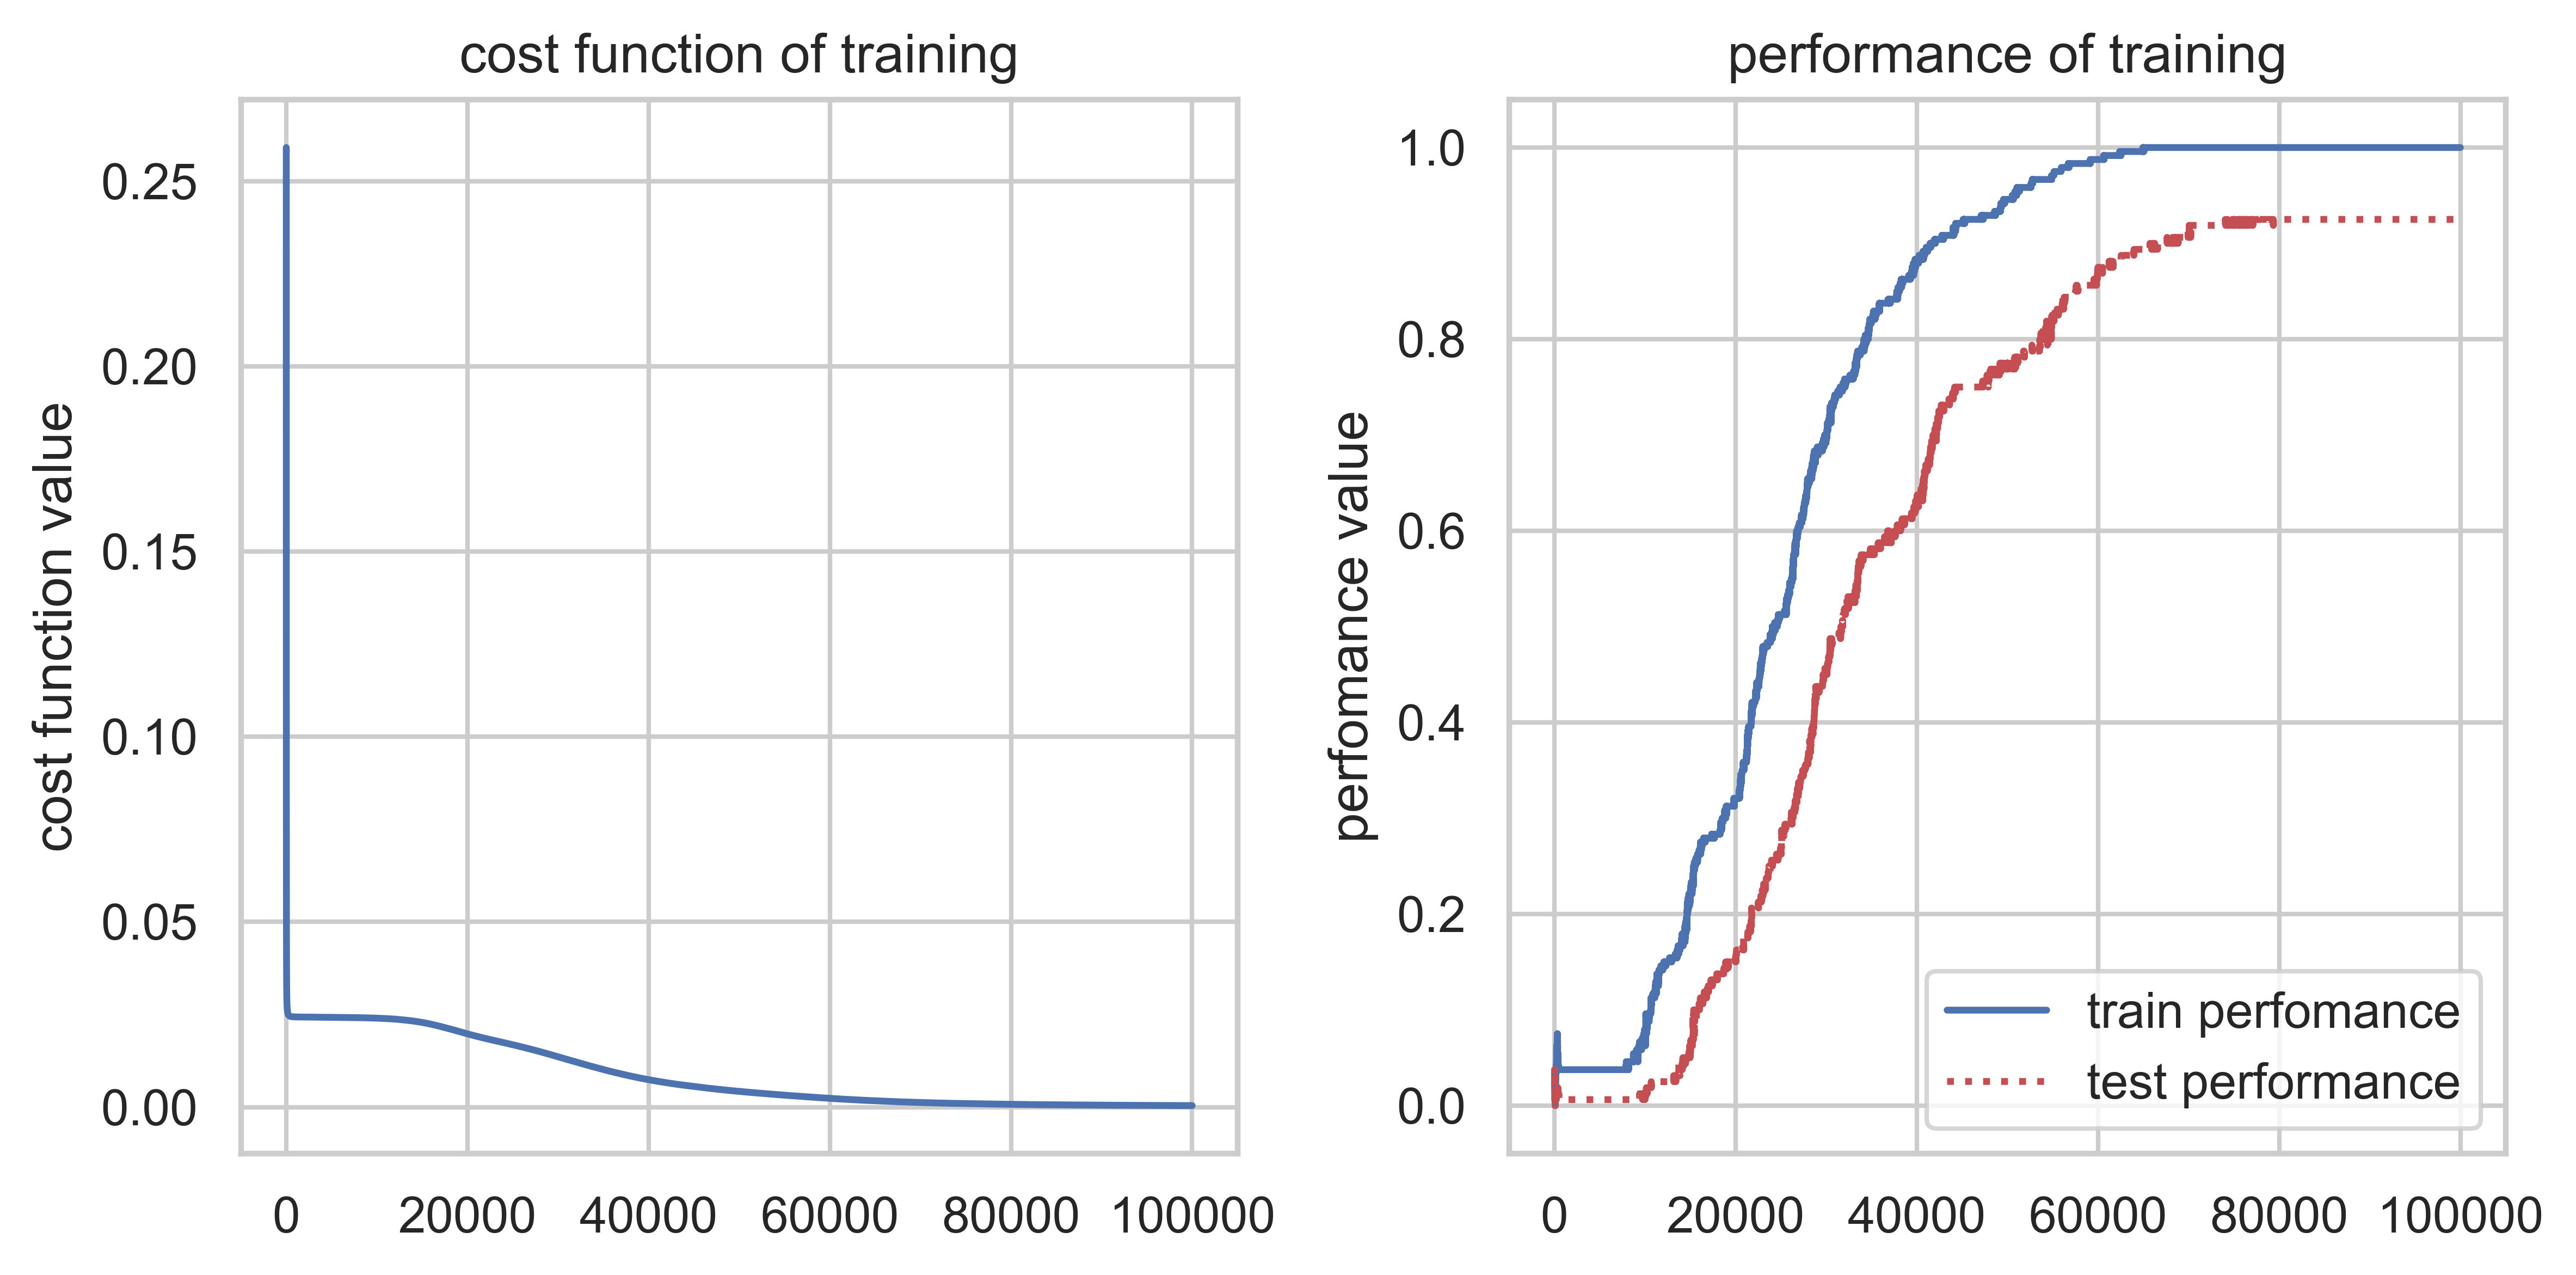

In [36]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("cost function of training")
plt.ylabel("cost function value")
plt.subplot(1, 2, 2)
plt.title("performance of training")
plt.ylabel("perfomance value")
plt.plot(hist.history['acc'], 'b-', label="train perfomance")
plt.plot(hist.history['val_acc'], 'r:', label="test performance")
plt.legend()
plt.tight_layout()
plt.show()

## 2. image augmentation을 적용한 CNN 사용 시

- 데이터 로드

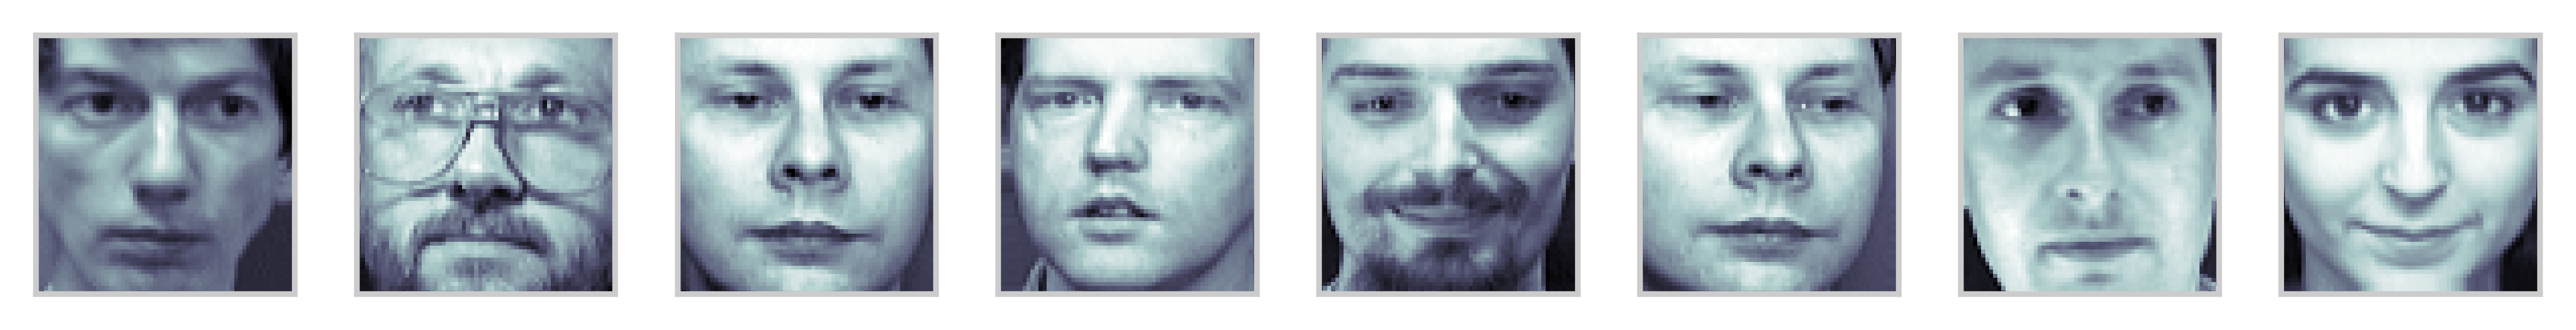

In [40]:
faces = fetch_olivetti_faces()
X_train0, X_test0, y_train0, y_test0 = train_test_split(faces.images, faces.target, test_size=0.4, random_state=0)
X_train = X_train0[:, :, :, np.newaxis]
X_test = X_test0[:, :, :, np.newaxis]
Y_train = np_utils.to_categorical(y_train0, 40)
Y_test = np_utils.to_categorical(y_test0, 40)

### # image augmentation을 적용한 데이터 수 뻥튀기

In [42]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    zoom_range=0.1,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator.fit(X_train)

test_generator = ImageDataGenerator()

train_iterator = train_generator.flow(
    X_train, Y_train, batch_size=len(X_train))

N = 50
X_train_new = []
Y_train_new = []
for i in range(N):
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    Y_train_new.append(y_train_new)

X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)

X_train_new.shape

(12000, 64, 64, 1)

### # CNN 모델 생성

In [43]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import *
from keras.regularizers import l2

from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import *

np.random.seed(0)
model = Sequential()
model.add(Conv2D(20, (4, 4), activation='relu', input_shape=(
    64, 64, 1), padding="same", kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Conv2D(50, (4, 4), activation='relu',
                 padding="same", kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100, activation='tanh', kernel_initializer="glorot_uniform"))
model.add(Dense(40, activation='softmax', kernel_initializer="glorot_uniform"))
model.compile(loss='categorical_crossentropy', metrics=[
              'accuracy'], optimizer=RMSprop())

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 20)        340       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 50)        16050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
__________

### # 모델생성 및 성능확인

In [45]:
%%time
hist = model.fit(X_train_new, Y_train_new, epochs=20,
                  batch_size=120, validation_data=(X_test, Y_test), verbose=2)

Train on 12000 samples, validate on 160 samples
Epoch 1/20
 - 38s - loss: 1.8583 - acc: 0.5336 - val_loss: 0.7930 - val_acc: 0.8437
Epoch 2/20
 - 40s - loss: 0.7547 - acc: 0.8308 - val_loss: 0.3888 - val_acc: 0.9062
Epoch 3/20
 - 40s - loss: 0.3594 - acc: 0.9284 - val_loss: 0.2700 - val_acc: 0.9375
Epoch 4/20
 - 40s - loss: 0.2070 - acc: 0.9608 - val_loss: 0.2025 - val_acc: 0.9313
Epoch 5/20
 - 40s - loss: 0.1207 - acc: 0.9803 - val_loss: 0.1548 - val_acc: 0.9500
Epoch 6/20
 - 41s - loss: 0.0806 - acc: 0.9853 - val_loss: 0.1609 - val_acc: 0.9500
Epoch 7/20
 - 41s - loss: 0.0640 - acc: 0.9877 - val_loss: 0.1646 - val_acc: 0.9437
Epoch 8/20
 - 40s - loss: 0.0397 - acc: 0.9933 - val_loss: 0.2026 - val_acc: 0.9313
Epoch 9/20
 - 41s - loss: 0.0388 - acc: 0.9926 - val_loss: 0.1413 - val_acc: 0.9562
Epoch 10/20
 - 42s - loss: 0.0355 - acc: 0.9923 - val_loss: 0.1422 - val_acc: 0.9562
Epoch 11/20
 - 43s - loss: 0.0169 - acc: 0.9973 - val_loss: 0.1395 - val_acc: 0.9625
Epoch 12/20
 - 42s - loss:

#### * 이미지 및 자료출처 : 데이터 사이언스 스쿨 홈페이지 5부 딥러닝

https://datascienceschool.net